# Week 03: In Class Assignment: End-to-End Project (Part 2)

### <p style="text-align: right;"> &#9989; Kyle.
<p style="text-align: right;"> &#9989; Lucas, Dawit, Carter, Jacob

![houses](https://www.mercurynews.com/wp-content/uploads/2017/04/oo24dg-web0409buslrealtrendsrisk02.jpg)


<h1><center> <font color='green'>Machine Learning Housing Corp.</font></h1></center>

This In Class Assignment completes what you have done last week with the Pre-Class and In-Class assignment. 

As we did last time, follow these steps:
1. read this notebook first so that you know what to expect for today
2. answer the questions below
3. turn in this notebook with your answers in the usual way (no need to resubmit the notebook from the textbook)

Last time you explored the nature of the problem, what the data generally looked like and examined some properties, such as correlations and statistics (thanks to nice functionality in `pandas`),  cleaned the data before it goes into ML algorithms. Now it is time to apply the ML algorithms and get a prediction.

Each of the sections below follow through the process described in the textbook and the notebook that comes with it. Read through that notebook and follow the steps in there. As you work through the notebook, answer the questions below. 


## Part 1. Regression

If you have your book handy, the ML starts on page 72. 

The three ML methods you will use are:
* [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): you have certainly used linear regression before, but examine what new options this library provides for you,

* [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html): we have not covered decision trees yet (we will soon!) - you might want to use decision trees in your project so this is a good time to see what they do,

* [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html): what does this do? (again, we will get to ensemble methods later, after decision trees); what are its methods and attributes and options?

&#9989; **Task:** Answer these questions in the markdown cell below:
1. How many columns are in the final dataset, the one that will be fed to the ML algorithm?
2. Why does the author pick these algorithms?
3. How does the author choose to measure the performance of the models? Are there any `sklearn` libraries that help here?
4. What does the number returned by `mean_absolute_error` represent?
5. Why does the author choose to predict using the training dataset?


<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. 24
2. They are simple and already come packaged in scikit-learn. 
3. Using RMSE and a distribution of them from the cross validation. All of these functions are already defined in sklearn. Doing the final eval he uses the RMSE to make a confidence interval using the stats.t.interval function
4. It simply the distance the prediction is from the actual value. This uses the absolute value instead of something like the square root of the squares
5. Predicting using the training set can test for overfitting since if we predict and get a 100% prediction then we've majorily overfit


____
## Part 2. Cross-validation
As already mentioned cross-validation is a powerful technique to estimate the performance of your model. 

&#9989; **Task:** Using the book's notebook as reference answer the questions below:

1. What `sklearn` function does the author use for cross validation?
2. What are the inputs of this function? Does the author pass the transformed dataset or the original dirty dataset?
3. What does each element of the arrays `lin_rmses`, `tree_rmses`, `forest_rmses` represent?
4. Take those arrays from the other notebook and plot them as a stacked histogram in this notebook. What does the plot tell you? 
5. Which of the three methods performs best, explain your answer?
6. Which of the three models is the most precise, explain your answer? 
7. Research the difference between `cross_validate` and `cross_val_score`. Why would you use one or the other?


<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. cross_val_score
2. The estimator, dirty X, y, a scorer, the amount of folds
3. The score for a specific fold
4. It tells us the distributions of RMSE the crossval gives us for each model
5. The random forest by far has the lowest RMSE
6. Random forest is also the most percise since of its low standard dev.
7. cross_validate allows for multiple metrics and also record fit/score times. cross_val_score only allows one metric. If you want it to not return a dictionary be uncool and use cross_val_score


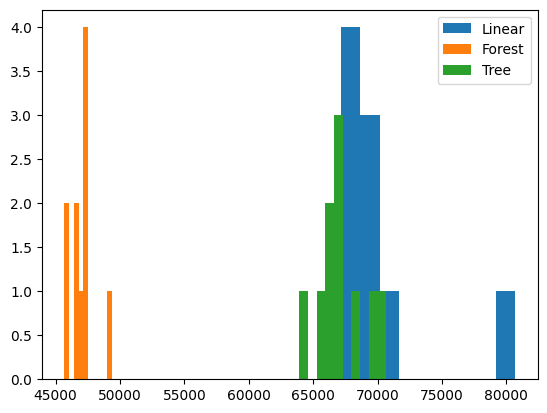

In [16]:
# Put your code here
import numpy as np
import matplotlib.pyplot as plt
lin_rmses=np.load("lin_rmses.npy")
forest_rmses=np.load("forest_rmses.npy")
tree_rmses=np.load("tree_rmses.npy")

plt.hist(lin_rmses, bins=10,stacked=True, label='Linear')
plt.hist(forest_rmses, bins=10,stacked=True, label='Forest')
plt.hist(tree_rmses, bins=10,stacked=True, label='Tree')
plt.legend()

____
## Part 3: Hyperparameter Tuning/Optimization 

At this point, what have you done? A lot of data science and lot of data cleaning and a lot of exploring accuracy of algorithms with CV. Now you can pick which estimator you want to use. 

The next phase of the ML workflow is making your estimator really work for you. As you saw above, each of the algorithms comes with a host of options. The parameters associated with those options are called "hyperparameters" because they are **internal to your estimator** and are separate from the parameters of your model. Like some of the other steps you have been following, hyperparameter tuning is so ubiquitous that `sklearn` has nice tools to help you. 

The difference between a parameter of your model and the hyperparameters of your estimator can be confusing. Here is a good way to understand the difference: look at the documentation for each of the estimators. You will see that each one accepts a large number of inputs, many of which are set to some default value. (You probably should look at something like the [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) rather than linear regression, which is too simple to have many options.) Most of these options, which you may typically ignore, are the hyperparameter that define the way the estimator is set up. This is because, for example, there isn't one decision tree, there are infinitely many -- which one do you want to use? 

To find the hyperparameters, you might need to do the training hundreds or thousands of times! But, the payoff is the most accurate algorithm! 

How do we search for the best hyperparameters?

![search](https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/74545i97245FDAA10376E9/image-size/large?v=1.0&px=999)

&#9989; **Task:** Research [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and give a short summary of what it can do for you.

* How do you use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with different algorithms?


<font size=6 color="#009600">&#9998;</font> *It depends on the hyperparameters that you want to find. You specificy a grid of parameters that you want to search over.* 


Below is a snippet of the code of the notebook. 

```python
    param_grid = [
        {'preprocessing__geo__n_clusters': [5, 8, 10],
        'random_forest__max_features': [4, 6, 8]},
        {'preprocessing__geo__n_clusters': [10, 15],
        'random_forest__max_features': [6, 8, 10]},
    ]
    grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                            scoring='neg_root_mean_squared_error', n_jobs = -1)
    grid_search.fit(housing, housing_labels)
```
&#9989; **Task:** Answer these questions in the markdown cell below:

1. Why are there two dictionaries in the `params_grid` list? Do they refer to different estimators in the pipeline? Why not putting them all together ?

2. What does the option `cv = 3` do?

3. What does `n_jobs` do?



<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. If they put them together it would have to take a lot iterations to search over the space. By giving smaller dictionaries it keeps it down.
2. 3 folds
3. The amount of cores you want to allocate


&#9989; **Task:** Research [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) and give a short summary of what it can do for you.

* How does it differ from `GridSearchCV` ?
* Why would you choose one over the other? 




<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. Instead of having specific amounts you give a range to seek paramters over
2. ALWAYS USE RANDOM IF YOU NOT LAME


_____
## Part 4. Conclusion

&#9989; **Task:** Write a paragraph addressing this point. In this two-part PCA-ICA, what did you learn? How important did you find the various steps? Which steps made the biggest difference in the power of the ML approach? Where do you think you should spend the most time in your projects to get the best results? 


<font size=6 color="#009600">&#9998;</font> As was the goal, I learned the process of and end-to-end, while simple, ML project. I learned the proper methods of handling the data such as when to create the train test split, how to set it up with the hashing to allow for more data to be added properly, and how to split with a stratified. It also showed through using Sklearn to simplify with pipelines. The pipeline was a big difference in organization of a project. Cleaning and preparing data should be the bulk of the time and effort


____
## Part 5. Explore other ML algorithms (Time Permitting)

&#9989; **Task:** Using the same dataset try different estimators maybe $k$-nearest neighbor regressor, or support vector regressor, etc.

In [28]:
# Put your code here

&#9989; **Question:** How does your new model compare with the previous ones?

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 


___

## Congratulations, you’re done!

Submit this assignment by uploading it to the course Desire2Learn web page. Go to the “In-class assignments” folder, find the appropriate submission link, and upload it there.

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.